In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
# all relevant libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
#path1 = "../Data/features_30_sec.csv"
path1 = '../Data/features_30_sec.csv'
dataset = pd.read_csv(path1)

In [3]:
header_row = dataset.columns.tolist()
print(header_row)

['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'label']


In [4]:
columns = ['filename','label']
features = dataset.drop(columns=columns, axis=1)  # Drop the 'label' column
labels = dataset['label']

In [5]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler

# Initialize a scaler object
scaler = StandardScaler()

# Fit the scaler on the training features and transform the training features
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing features using the fitted scaler
X_test_scaled = scaler.transform(X_test)

from sklearn.preprocessing import LabelEncoder

# Initialize a label encoder object
label_encoder = LabelEncoder()

# Fit and transform the label encoder on the training labels
y_train_encoded = label_encoder.fit_transform(y_train)

# Perform the same label encoding on the testing labels
y_test_encoded = label_encoder.transform(y_test)

In [7]:
from sklearn.linear_model import LogisticRegression

# Create the logistic regression model with L1 regularization
model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

# Fit the model to the training data
model.fit(X_train_scaled, y_train_encoded)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [8]:
# Get the non-zero coefficients and corresponding feature names
non_zero_coefficients = model.coef_[0]
feature_names = features.columns

# Create a dictionary to store the feature contributions
feature_contributions = {}

# Iterate over the non-zero coefficients and feature names
for feature, coefficient in zip(feature_names, non_zero_coefficients):
    feature_contributions[feature] = coefficient

# Print the feature contributions in descending order
sorted_contributions = sorted(feature_contributions.items(), key=lambda x: abs(x[1]), reverse=True)
for feature, contribution in sorted_contributions:
    print(f"Feature: {feature}, Contribution: {contribution}")

Feature: spectral_centroid_var, Contribution: -3.40399250952687
Feature: spectral_centroid_mean, Contribution: -2.8365977427191935
Feature: zero_crossing_rate_mean, Contribution: 2.278749962726417
Feature: mfcc6_mean, Contribution: 1.8784034882094371
Feature: mfcc3_mean, Contribution: 1.748012477403268
Feature: chroma_stft_mean, Contribution: -1.3201744830798212
Feature: mfcc12_mean, Contribution: -1.2594256581592898
Feature: chroma_stft_var, Contribution: 1.2301978498142716
Feature: rms_mean, Contribution: 1.1775200739564162
Feature: mfcc5_var, Contribution: 1.058983900367294
Feature: mfcc7_mean, Contribution: -0.9412234594683341
Feature: rms_var, Contribution: 0.7838795119016633
Feature: mfcc4_mean, Contribution: 0.7244553186138937
Feature: mfcc18_mean, Contribution: -0.6462652346853179
Feature: mfcc1_mean, Contribution: 0.6265376283310513
Feature: mfcc10_mean, Contribution: 0.6111111157546943
Feature: spectral_bandwidth_var, Contribution: -0.5804859024691842
Feature: mfcc2_var, Cont

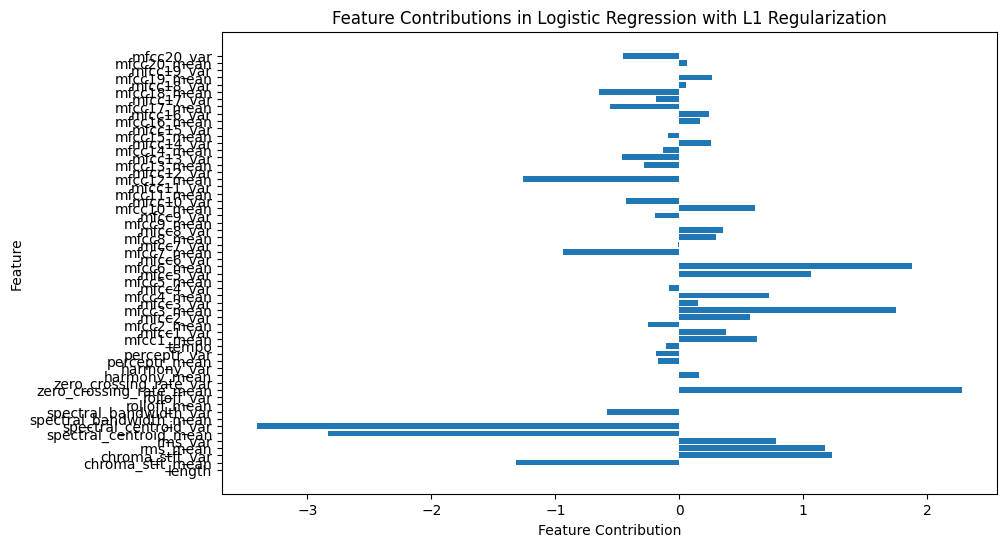

In [9]:
import matplotlib.pyplot as plt

# Get the feature names and contributions
feature_names = list(feature_contributions.keys())
contributions = list(feature_contributions.values())

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(contributions)), contributions, align='center')
plt.yticks(range(len(contributions)), feature_names)
plt.xlabel('Feature Contribution')
plt.ylabel('Feature')
plt.title('Feature Contributions in Logistic Regression with L1 Regularization')
plt.show()

In [10]:
negative_contributions = {feature: contribution for feature, contribution in feature_contributions.items() if contribution < 0}

In [11]:
features_with_positive_contributions = features.drop(negative_contributions.keys(), axis=1)

In [12]:
features = features_with_positive_contributions

In [13]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the features
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.fit_transform(X_test)

In [15]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train_normalized, y_train_encoded)

GaussianNB()

In [16]:
from sklearn.metrics import classification_report

# Get the predictions on the test set
test_predictions = nb_classifier.predict(X_test_normalized)

# Generate the classification report
classification_rep = classification_report(y_test_encoded, test_predictions)

# Print the classification report
print(classification_rep)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.57      0.31      0.40        13
           2       0.00      0.00      0.00        27
           3       0.17      0.29      0.21        21
           4       0.14      0.73      0.23        15
           5       0.33      0.59      0.42        22
           6       0.00      0.00      0.00        25
           7       0.00      0.00      0.00        13
           8       0.42      0.48      0.45        23
           9       0.38      0.24      0.29        21

    accuracy                           0.25       200
   macro avg       0.20      0.26      0.20       200
weighted avg       0.19      0.25      0.19       200



/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Define the parameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Create the Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform grid search with cross-validation
grid_search = GridSearchCV(nb_classifier, param_grid, cv=5)
grid_search.fit(X_train_normalized, y_train)

# Get the best model and its hyperparameters
best_classifier = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
test_predictions = best_classifier.predict(X_test_normalized)

# Generate the classification report
classification_rep = classification_report(y_test, test_predictions)

# Print the best hyperparameters and the classification report
print("Best Hyperparameters:", best_params)
print(classification_rep)

Best Hyperparameters: {'var_smoothing': 1e-07}
              precision    recall  f1-score   support

       blues       0.00      0.00      0.00        20
   classical       0.57      0.31      0.40        13
     country       0.00      0.00      0.00        27
       disco       0.17      0.29      0.21        21
      hiphop       0.14      0.73      0.23        15
        jazz       0.33      0.59      0.42        22
       metal       0.00      0.00      0.00        25
         pop       0.00      0.00      0.00        13
      reggae       0.42      0.48      0.45        23
        rock       0.38      0.24      0.29        21

    accuracy                           0.25       200
   macro avg       0.20      0.26      0.20       200
weighted avg       0.19      0.25      0.19       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
import os
subfolders = os.listdir('../Data/genres_original/')
subfolders


['pop',
 'metal',
 'disco',
 'blues',
 'reggae',
 'classical',
 'rock',
 'hiphop',
 'country',
 'jazz']

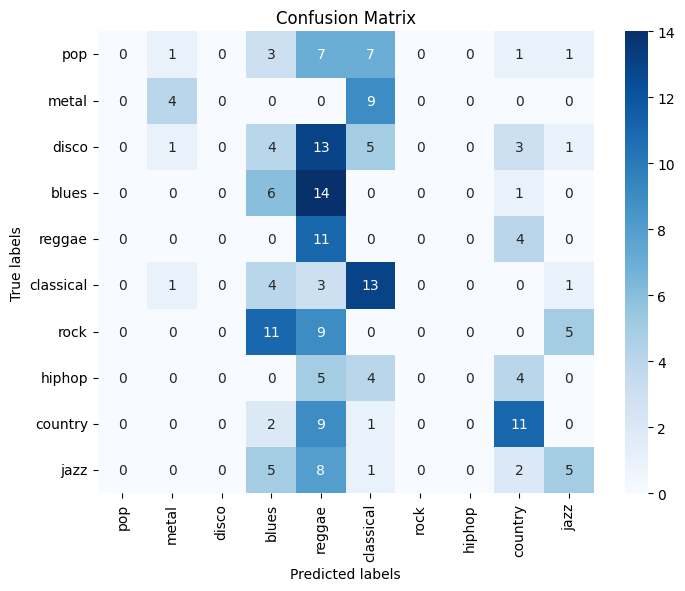

In [20]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the predictions on the test set
test_predictions = nb_classifier.predict(X_test_normalized)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, test_predictions)

# Plotting the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=subfolders, yticklabels=subfolders)  # Provide class names if available
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
